## 1. Problem Statement
Predict medical insurance costs (`expenses`) based on a single feature (`age` or `bmi`) using linear regression.

## 2. Tools
- Pandas: to load and prepare the data
- NumPy: for scientific computing
- Matplotlib: for visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## 3. Data loading and preparation
Load the dataset using pandas and prepare for model

In [5]:
data = pd.read_csv("C:/Users/gossa/Documents/ML_Journey/Datasets/insurance.csv")

In [6]:
# See the top five rows of the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# See general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Our data is clean later we will see if there is ouliers or abnormality in the dataset

### Selecting feature and target
In this case let's take `bmi` as feature and `charges` as target

In [10]:
# Let's select our feature and target and store the values in numpy array
x = data['age'].values
y = data['charges'].values

### Visualize the row data
Visualizing the row data help us to detect outliers

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

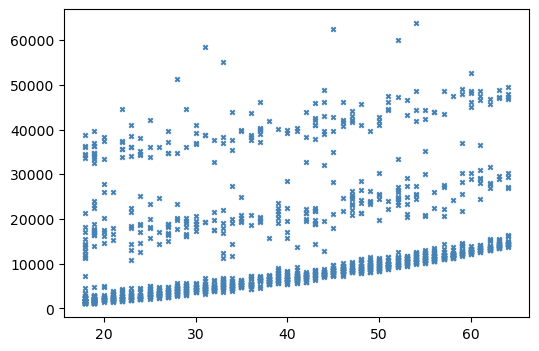

In [12]:
# Let's set up some styles for the graph
plt.style.use('seaborn-v0_8-muted')
plt.figure(figsize=(6, 4), dpi=100)

plt.scatter(x, y, marker = 'x', c = 'steelblue', s = 10)
plt.title

## 4. Linear regression
Let's apply a simple regression model `f(x) = wx + b`. From this we will determine `w` and `b` using gradient descent algorithm. 

### Compute cost function
$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$
Where:
$$ f_{w,b}(x) = wx + b $$
- **$w$**: Weight (slope)  
- **$b$**: Bias (y-intercept)  
- **$x$**: Input feature 

In [15]:
def cost_function(x, y, w, b):
    """compute cost function
    Args:
    x (ndarray (m, )): feature data
    y (ndarray (m, )): target data
    w, b (float): function parameters

    returns:
    total cost (scalar)
    """
    m = len(x)
    f_wb = w*x + b
    
    total_cost = (1/(2*m)) * np.sum((f_wb - y)**2)
    return total_cost

### Compute gradient function
$$ \frac{\partial}{\partial w} J(w,b) = \frac{1}{m} \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} $$
$$ \frac{\partial}{\partial b} J(w,b) = \frac{1}{m} \sum_{i=1}^m (f_{w,b}(x^{(i)}) - y^{(i)}) $$


In [17]:
def gradient_function(x, y, w, b):
    """
    compute the partial derivative of the cost function with respect to w and b
    Args:
    x (ndarray (m, )): feature data
    y (ndarray (m, )): target data
    w, b (float): function parameters

    Returns:
    dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
    dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """
    m = len(x)
    f_wb = w*x + b

    dj_dw = (1/m) * np.sum((f_wb - y) * x)
    dj_db = (1/m) * np.sum(f_wb - y)

    return dj_dw, dj_db

### Geadient descent
$$ w := w - \alpha \frac{\partial}{\partial w} J(w,b) $$
$$ b := b - \alpha \frac{\partial}{\partial b} J(w,b) $$

In [19]:
def gradient_descent(x, y, w_in, b_in, alpha, iterations, cost_function, gradient_function):
    """  
    Performs gradient descent to fit w,b. Updates w,b by taking 
    iteration gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      iterations (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    w = w_in
    b = b_in
    j_history = []
    p_history = []

    for i in range(iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        j_history.append(cost_function(x, y, w, b))
        if i % math.ceil(iterations/10) == 0:
            print(f"Iteration {i:5}: cost {cost_function(x, y, w, b):0.2e}:dj_dw {dj_dw:0.3e}:"
                 f"dj_db {dj_db:0.3e}:w {w:0.3e}: b {b:0.4e}")

    return w, b

In [20]:
w_in = 0
b_in = 0
alpha = 1e-2
iterations = 10000
gradient_descent(x, y, w_in, b_in, alpha, iterations, cost_function, gradient_function)

Iteration     0: cost 2.52e+10:dj_dw -5.711e+05:dj_db -1.327e+04:w 5.711e+03: b 1.3270e+02
Iteration  1000: cost nan:dj_dw nan:dj_db nan:w nan: b nan
Iteration  2000: cost nan:dj_dw nan:dj_db nan:w nan: b nan


C:\Users\gossa\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\gossa\AppData\Local\Temp\ipykernel_3292\1259810058.py:14: RuntimeWarning: overflow encountered in square
  total_cost = (1/(2*m)) * np.sum((f_wb - y)**2)
C:\Users\gossa\AppData\Local\Temp\ipykernel_3292\3162998416.py:28: RuntimeWarning: invalid value encountered in scalar subtract
  w -= alpha * dj_dw


Iteration  3000: cost nan:dj_dw nan:dj_db nan:w nan: b nan
Iteration  4000: cost nan:dj_dw nan:dj_db nan:w nan: b nan
Iteration  5000: cost nan:dj_dw nan:dj_db nan:w nan: b nan
Iteration  6000: cost nan:dj_dw nan:dj_db nan:w nan: b nan
Iteration  7000: cost nan:dj_dw nan:dj_db nan:w nan: b nan
Iteration  8000: cost nan:dj_dw nan:dj_db nan:w nan: b nan
Iteration  9000: cost nan:dj_dw nan:dj_db nan:w nan: b nan


(nan, nan)